  # Python for Data Science Bootcamp
  ## K Nearest Neighbors

Import pandas and numpy packages

In [1668]:
import numpy as np
import pandas as pd

Read the iris CSV file

In [1669]:
iris = pd.read_csv('iris.csv', encoding="latin1")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Explore the data

In [1670]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [1671]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Create two variables for features and target.  Convert them into values.

In [1672]:
feature_cols = list(iris.columns.values)[:-1]

features = iris[feature_cols].values # numpy array
target = iris.species.values # numpy array

# pandas for data manipulation
# converting to numpy array for a format that scikit can use (gets rid of column and row names)
# scikit expects numpy objects (though scikit is adding capability to take in pandas objects in future, potentially)

Scikit-learn has a function to split data into training and testing sets

In [1673]:
from sklearn.model_selection import train_test_split

Apply train_test_split to sample data

In [1674]:
data = [['M',67],['Tu',74],['W',80],['Th',68],['F',78]]
sales = [240,360,700,320,1100]

In [1675]:
# pandas is good for cleaning / manipulating data (can use names for columns, not just non-human-readable indices)

features_train, features_test, target_train, target_test = \
    train_test_split(data, sales, test_size=0.20, random_state=0)

View results of train_test_split 

In [1676]:
print('train_test_split \n\n')

print('Training Set')
print(features_train)
print(target_train,'\n\n')
print('Test Set')
print(features_test)
print(target_test)

train_test_split 


Training Set
[['M', 67], ['Tu', 74], ['Th', 68], ['F', 78]]
[240, 360, 320, 1100] 


Test Set
[['W', 80]]
[700]


Split the iris data into training set and test set

In [1677]:
iris_features_train, iris_features_test, iris_target_train, iris_target_test = \
    train_test_split(features,target,test_size=0.20, random_state=0)

In [1678]:
print(iris_features_train.shape)
print(iris_features_test.shape)
print(iris_target_train.shape)
print(iris_target_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Import the K Nearest Neighbors classifier from scikit-learn

In [1679]:
from sklearn.neighbors import KNeighborsClassifier
# fit for K Nearest Neighbors algorithm will just store data points 
# for other algorithms, fit may do other complex procedures/calculations to train model (i.e. coefficients for regression model)

# predict(X) - predicts class labels for provided data
# predict_proba(X) - more granular breakdown of probability for each class label 
# score(X, Y, sample_weight=None) - gives mean accuracy on the given test data and labels (scores the accuracy of your model using test data)

Train the KNN classifier

In [1680]:
iris_model = KNeighborsClassifier(5).fit(iris_features_train, iris_target_train)

Compare predictions with actual results

In [1681]:
print(iris_model.predict(iris_features_test))
print(iris_target_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


Predict probabilities

In [1682]:
iris_model.predict_proba(iris_features_test)

array([[ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.4,  0.6],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.8,  0.2],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ]])

Score the model

In [1683]:
iris_model.score(iris_features_test, iris_target_test)

# model performance will vary depending on how you split data into training and testing
# taking average of model performance across different splits improves performance score's accuracy

0.96666666666666667

## K-Folds Cross-Validation

Remember how to index numpy arrays with indices?

In [1684]:
# 5-olds cross-validation
# separate data into 5 groups
# train and test k times, with a different group as the test group
# each group uses same samples for all training/testing iterations, just with a different sample as the test group

# after all 5 simulations, take average of the scores from each training/testing iteration
sample_data = np.array([0, 10, 20, 30, 40, 50])
sample_indices = [4, 1, 3]
print(sample_data[sample_indices])

[40 10 30]


Import the KFold function from scikit-learn

In [1685]:
from sklearn.model_selection import KFold

KFold function creates indices for separating training and test sets

In [1686]:
# split - generates indices to split data into training and test set
# using indices instead of actually 5 copies of the data saves on computer memory

my_k_fold_indices = KFold(3, shuffle=False)
print(my_k_fold_indices) # collection of indices we use to separate our data into training and testing sets

KFold(n_splits=3, random_state=None, shuffle=False)


Create some mock data

In [1687]:
mock_features = np.array([[1,10],[2,20],[3,30]])
mock_target = np.array([100,200,300])

Let's see what is in the k_fold_indices

In [1688]:
for train_indices, test_indices in \
    my_k_fold_indices.split(mock_features, mock_target):
        print(train_indices, test_indices)

[1 2] [0]
[0 2] [1]
[0 1] [2]


Let's use the indices to index values in an array.

In [1689]:
# using the train_indices 
# using the test_indices 

for train_indices,test_indices in k_fold_indices.split(mock_features,mock_target):
    print('Training Set')
    print(mock_features[train_indices])
    print(mock_target[train_indices])
    print('Test Set')
    print(mock_features[test_indices])
    print(mock_target[test_indices])
    print

Training Set
[[ 2 20]
 [ 3 30]]
[200 300]
Test Set
[[ 1 10]]
[100]
Training Set
[[ 1 10]
 [ 3 30]]
[100 300]
Test Set
[[ 2 20]]
[200]
Training Set
[[ 1 10]
 [ 2 20]]
[100 200]
Test Set
[[ 3 30]]
[300]


Function for calculating cross-validation

In [1690]:
# cross validation function with average score
def cross_validate(features, target, classifier, k_fold=10, r_state=None) :
    # derive a set of (random) training and testing indices
    k_fold_indices = KFold(k_fold,shuffle=True, random_state=r_state)
    k_score_total = 0
    # for each training and testing slices run the classifier, and score the results
    for train_indices, test_indices in k_fold_indices.split(features, target):
        model = classifier.fit(features[train_indices],target[train_indices])
        k_score = model.score(features[test_indices],target[test_indices])
        k_score_total += k_score
    # return the average accuracy
    return k_score_total/k_fold

Test the cross_validate function with different numbers of neighbors

In [1691]:
cross_validate(features, target, KNeighborsClassifier(5), 10, 0)

0.95999999999999996

## Exercise
#### 1. Load the clean_data.csv as a DataFrame

In [1692]:
titanic_data = pd.read_csv('clean_data.csv', encoding='latin1')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null bool
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Pclass_1       891 non-null int64
Pclass_2       891 non-null int64
Pclass_3       891 non-null int64
Title          891 non-null object
Age_all        891 non-null float64
Age_sex        891 non-null float64
Age_title      891 non-null float64
dtypes: bool(1), float64(5), int64(8), object(5)
memory usage: 126.2+ KB


#### 2. Separate the data into features (limit to age, sex, pclass dummy variables) and target (Note: Make sure you convert the data to a numpy array by typing .values at end of DataFrame)

In [1693]:
titanic_data = titanic_data[['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_all', 'Sex']]

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass_1    891 non-null int64
Pclass_2    891 non-null int64
Pclass_3    891 non-null int64
Age_all     891 non-null float64
Sex         891 non-null bool
dtypes: bool(1), float64(1), int64(4)
memory usage: 35.8 KB


In [1694]:
titanic_features = titanic_data[['Age_all', 'Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3']].values
titanic_target = titanic_data['Survived'].values

print(titanic_features)
print(titanic_target)

[[22.0 True 0 0 1]
 [38.0 False 1 0 0]
 [26.0 False 0 0 1]
 ..., 
 [29.6991176471 False 0 0 1]
 [26.0 True 1 0 0]
 [32.0 True 0 0 1]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 

#### 3. Build a KNN model and test the accuracy of the model using kfold cross-validation

In [1695]:
cross_validate(titanic_features, titanic_target, KNeighborsClassifier(3), 10, 0)

0.75645443196004991

### Bonus: Create a for loop to test different numbers of neighbors

In [1696]:
for k in [3, 5, 10]:
    print(cross_validate(titanic_features, titanic_target, KNeighborsClassifier(k), 10, 0))

0.75645443196
0.75531835206
0.754232209738


In [1697]:
for neighbor in [3, 5, 10]:
    print(cross_validate(titanic_features, titanic_target, KNeighborsClassifier(neighbor, weights='distance'), 10, 0))

0.780024968789
0.784506866417
0.793495630462


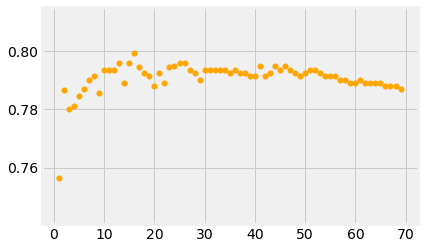

In [1698]:
# list of (neighbors, accuracy)

knn_accuracy_with_neighbors = [(neighbor, cross_validate(titanic_features, titanic_target, KNeighborsClassifier(neighbor, weights='distance'), 10, 0)) for neighbor in range(1, 70)]

import matplotlib.pyplot as plt
%matplotlib inline

canvas = plt.figure()
plt.style.use('fivethirtyeight')
first_graph = canvas.add_subplot(111)

zipped_data = list(zip(*knn_accuracy_with_neighbors))
first_graph.scatter(zipped_data[0], zipped_data[1], s=30, color='orange', alpha='1')



## Data Normalization

Calculate the mean and standard deviation

In [1699]:
# this algorithm we created is primarily predicting by Age 
# (since Age's scale is much larger than that for Sex and Pclass – primarily calculating nearest neighbors by Age, because distance is most dramatic along Age axis)

# normalize weights across all variables by normalizing the data

avg_age = titanic_data.Age_all.mean()
stdev_age = titanic_data.Age_all.std()

print(avg_age)
print(stdev_age)

29.699117647066895
13.002015226002877


Subtract the mean and divide by the standard deviation

In [1700]:
titanic_data['Age_norm'] = (titanic_data.Age_all - avg_age) / stdev_age

Create new features using normalized data

In [1701]:
titanic_features_normalized = titanic_data[['Age_norm', 'Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3']].values

knn_accuracy_with_neighbors_normalized = [(neighbor, cross_validate(titanic_features_normalized, titanic_target, KNeighborsClassifier(neighbor, weights='distance'), 10, 0)) for neighbor in range(1, 70)]
zipped_data_normalized = list(zip(*knn_accuracy_with_neighbors_normalized))

print(zipped_data_normalized[1])

percentages = list(zipped_data_normalized[1])
print(sum(percentages)/len(percentages))

(0.76205992509363296, 0.8002247191011238, 0.79127340823970038, 0.80138576779026227, 0.80249687890137333, 0.80474406991260916, 0.80922596754057419, 0.80922596754057419, 0.80697877652933825, 0.80473158551810242, 0.80585518102372033, 0.80136079900124846, 0.80360799001248429, 0.80473158551810242, 0.80248439450686637, 0.80360799001248451, 0.80360799001248451, 0.80248439450686637, 0.81034956304619232, 0.80360799001248451, 0.81147315855181024, 0.81147315855181024, 0.81147315855181024, 0.81034956304619232, 0.81147315855181024, 0.81034956304619232, 0.81147315855181024, 0.81147315855181024, 0.81259675405742815, 0.81034956304619232, 0.81034956304619232, 0.8103495630461921, 0.81034956304619232, 0.81034956304619232, 0.81034956304619232, 0.80922596754057419, 0.81034956304619232, 0.81034956304619232, 0.81034956304619232, 0.81034956304619232, 0.81034956304619232, 0.80922596754057419, 0.81034956304619232, 0.80922596754057419, 0.81034956304619232, 0.80922596754057419, 0.80922596754057419, 0.809225967540

Test KNN on normalized data

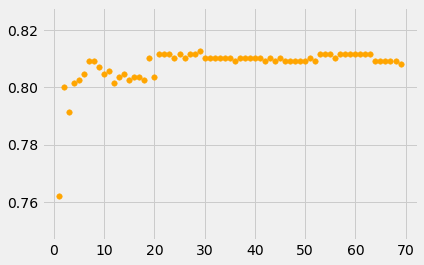

In [1702]:
canvas_normalized = plt.figure()
plt.style.use('fivethirtyeight')
first_graph_normalized = canvas_normalized.add_subplot(111)

first_graph_normalized.scatter(zipped_data_normalized[0], zipped_data_normalized[1], s=30, color='orange', alpha='1')


## Random Forest

Import the Random Forest function

In [1703]:
from sklearn.ensemble import RandomForestClassifier

Create an instance of a random forest classifier.  Random state is used to set random number generator for reproducible results

In [1704]:
random_forest_model = RandomForestClassifier(random_state=0)

Run the cross-validation function using the Random Forest algorithm

In [1705]:
random_forest_score = cross_validate(titanic_features, titanic_target, random_forest_model, 10, 0)

print(random_forest_score)
print(titanic_features)

0.804756554307
[[22.0 True 0 0 1]
 [38.0 False 1 0 0]
 [26.0 False 0 0 1]
 ..., 
 [29.6991176471 False 0 0 1]
 [26.0 True 1 0 0]
 [32.0 True 0 0 1]]


Investigate feature importances

In [1706]:

print(random_forest_model.fit(titanic_features, titanic_target).feature_importances_)

[ 0.4359133   0.40366222  0.05078753  0.02608483  0.08355212]


## Exercise

- Implement the random forest algorithm on the titanic data
- Review the random forest algorithm model parameters on sklearn 
- Adjust parameters to get the best model performance

### Make a Prediction for Kaggle

Train the model using the best data available (in the case of the Titanic you'd use all the data)

In [1707]:
# cross_validate(all_titanic_features, all_titanic_target, random_forest_model, 10, 0)

Create a DataFrame with the test.csv data

In [1708]:
titanic_test = pd.read_csv('test.csv', encoding='latin1')

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1709]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1710]:
titanic_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Clean text and missing values

In [1711]:
# cleaning text
titanic_test.Sex.replace(to_replace=['male','female'], value=[True,False], inplace=True)

# clean missing values
avg_age = titanic_test.Age.mean()
titanic_test.Age = titanic_test.Age.fillna(avg_age)
titanic_test = titanic_test[pd.notnull(titanic_test['Fare'])]
# titanic_test = titanic_test[pd.notnull(titanic_test['Cabin'])]

print(titanic_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null bool
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       417 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 36.2+ KB
None


Convert Pclass to dummies and merge to data

In [1712]:
pclasses = pd.get_dummies(titanic_test.Pclass,prefix = 'Pclass')
titanic_test = pd.merge(titanic_test, pclasses, left_index=True, right_index=True)

# Also convert Embarked to dummies and merge to data
embarkeds = pd.get_dummies(titanic_test.Embarked,prefix = 'Embarked')
titanic_test = pd.merge(titanic_test, embarkeds, left_index=True, right_index=True)

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",True,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",False,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",True,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",True,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1


Select features from test data and convert to numpy array

In [1717]:
titanic_test_features = ['Age', 'Sex', 'Pclass_1', 'Pclass_2', 'Pclass_3']
titanic_test_features_vals = titanic_test[titanic_test_features].values

print(titanic_test_features_vals)

[[34.5 True 0 0 1]
 [47.0 False 0 0 1]
 [62.0 True 0 1 0]
 ..., 
 [38.5 True 0 0 1]
 [30.272590361445783 True 0 0 1]
 [30.272590361445783 True 0 0 1]]


Create predictions

In [1718]:
titanic_predictions = random_forest_model.predict(titanic_test_features_vals)
titanic_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0,

Add Predictions as new column in DataFrame

In [1720]:
titanic_test['Survived'] = titanic_predictions

titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,"Kelly, Mr. James",True,34.50000,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",False,47.00000,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",True,62.00000,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",True,27.00000,0,0,315154,8.6625,NaN,S,0,0,1,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,22.00000,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1,1
5,897,3,"Svensson, Mr. Johan Cervin",True,14.00000,0,0,7538,9.2250,NaN,S,0,0,1,0,0,1,0
6,898,3,"Connolly, Miss. Kate",False,30.00000,0,0,330972,7.6292,NaN,Q,0,0,1,0,1,0,0
7,899,2,"Caldwell, Mr. Albert Francis",True,26.00000,1,1,248738,29.0000,NaN,S,0,1,0,0,0,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",False,18.00000,0,0,2657,7.2292,NaN,C,0,0,1,1,0,0,0
9,901,3,"Davies, Mr. John Samuel",True,21.00000,2,0,A/4 48871,24.1500,NaN,S,0,0,1,0,0,1,0


Save as CSV (make sure you set index=False)

In [ ]:
kaggle = titanic_test[['PassengerId','Survived']]
kaggle.to_csv(‘kaggle_titanic_submission.csv', index=False)